# Read Data

In [1]:
df <- read.table('./Dataset/fertility_Diagnosis.txt', sep = ",")

In [2]:
attrbs = c('season','age','childhood_disease','trauma','surgeries','high_fever','alcoholic','smoking','sitting','diag_result')

In [3]:
colnames(df) <- attrbs

In [4]:
df <- transform(df, season = as.factor(season), 
                    high_fever = as.factor(high_fever), 
                    alcoholic = as.factor(alcoholic),
                    smoking = as.factor(smoking), 
                    diag_result = as.factor(diag_result))

In [5]:
head(df)

season,age,childhood_disease,trauma,surgeries,high_fever,alcoholic,smoking,sitting,diag_result
-0.33,0.69,0,1,1,0,0.8,0,0.88,N
-0.33,0.94,1,0,1,0,0.8,1,0.31,O
-0.33,0.50,1,0,0,0,1,-1,0.50,N
-0.33,0.75,0,1,1,0,1,-1,0.38,N
-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [6]:
str(df)

'data.frame':	100 obs. of  10 variables:
 $ season           : Factor w/ 4 levels "-1","-0.33","0.33",..: 2 2 2 2 2 2 2 2 4 4 ...
 $ age              : num  0.69 0.94 0.5 0.75 0.67 0.67 0.67 1 0.64 0.61 ...
 $ childhood_disease: int  0 1 1 0 1 1 0 1 0 1 ...
 $ trauma           : int  1 0 0 1 1 0 0 1 0 0 ...
 $ surgeries        : int  1 1 0 1 0 1 0 1 1 0 ...
 $ high_fever       : Factor w/ 3 levels "-1","0","1": 2 2 2 2 2 2 1 2 2 2 ...
 $ alcoholic        : Factor w/ 5 levels "0.2","0.4","0.6",..: 4 4 5 5 4 4 4 3 4 5 ...
 $ smoking          : Factor w/ 3 levels "-1","0","1": 2 3 1 1 1 2 1 1 1 1 ...
 $ sitting          : num  0.88 0.31 0.5 0.38 0.5 0.5 0.44 0.38 0.25 0.25 ...
 $ diag_result      : Factor w/ 2 levels "N","O": 1 2 1 1 2 1 1 1 1 1 ...


# Distribution of Categeorical and Ordinal Variables

In [7]:
library(ggplot2)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.4.4"

In [40]:
plot_hist <- function(df, property, width=4, height=4, split_var = NULL) 
{
    # This function represent the count of each histogram bar on its top.
    
    options(repr.plot.width = width, repr.plot.height = height)
    
    p <- ggplot(data = df) + 
    geom_bar(aes_string(x = property), stat = "count", color = "cyan")
    
    if(!is.null(split_var))
        p <- p + facet_wrap(as.formula(paste("~", split_var)))

    p + geom_text(data = as.data.frame(ggplot_build(p)$data),
                  aes(x=x, y=count, label = count),
                  nudge_y = 2) + xlab(property)
}

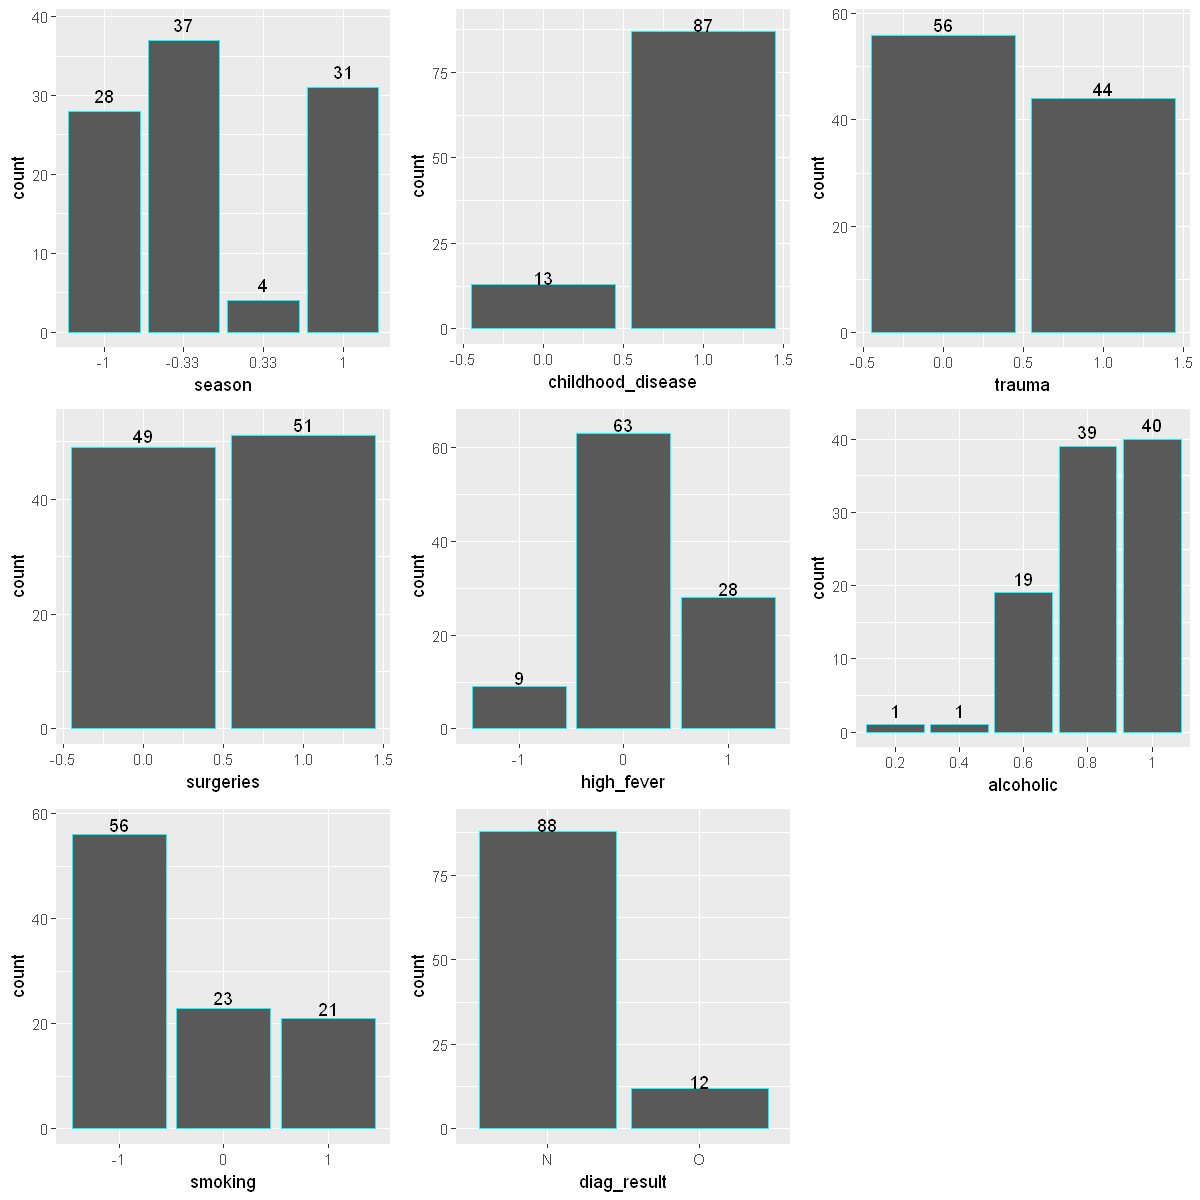

In [41]:
p <- list()
count = 1

for (x in attrbs)
{
    if(class(df[[x]]) == 'factor' | class(df[[x]]) == 'integer')
    {
        p[[count]] <- plot_hist(df, x)
        count <- count + 1
    }
}

options(repr.plot.width = 10, repr.plot.height = 10)
do.call(grid.arrange, p)

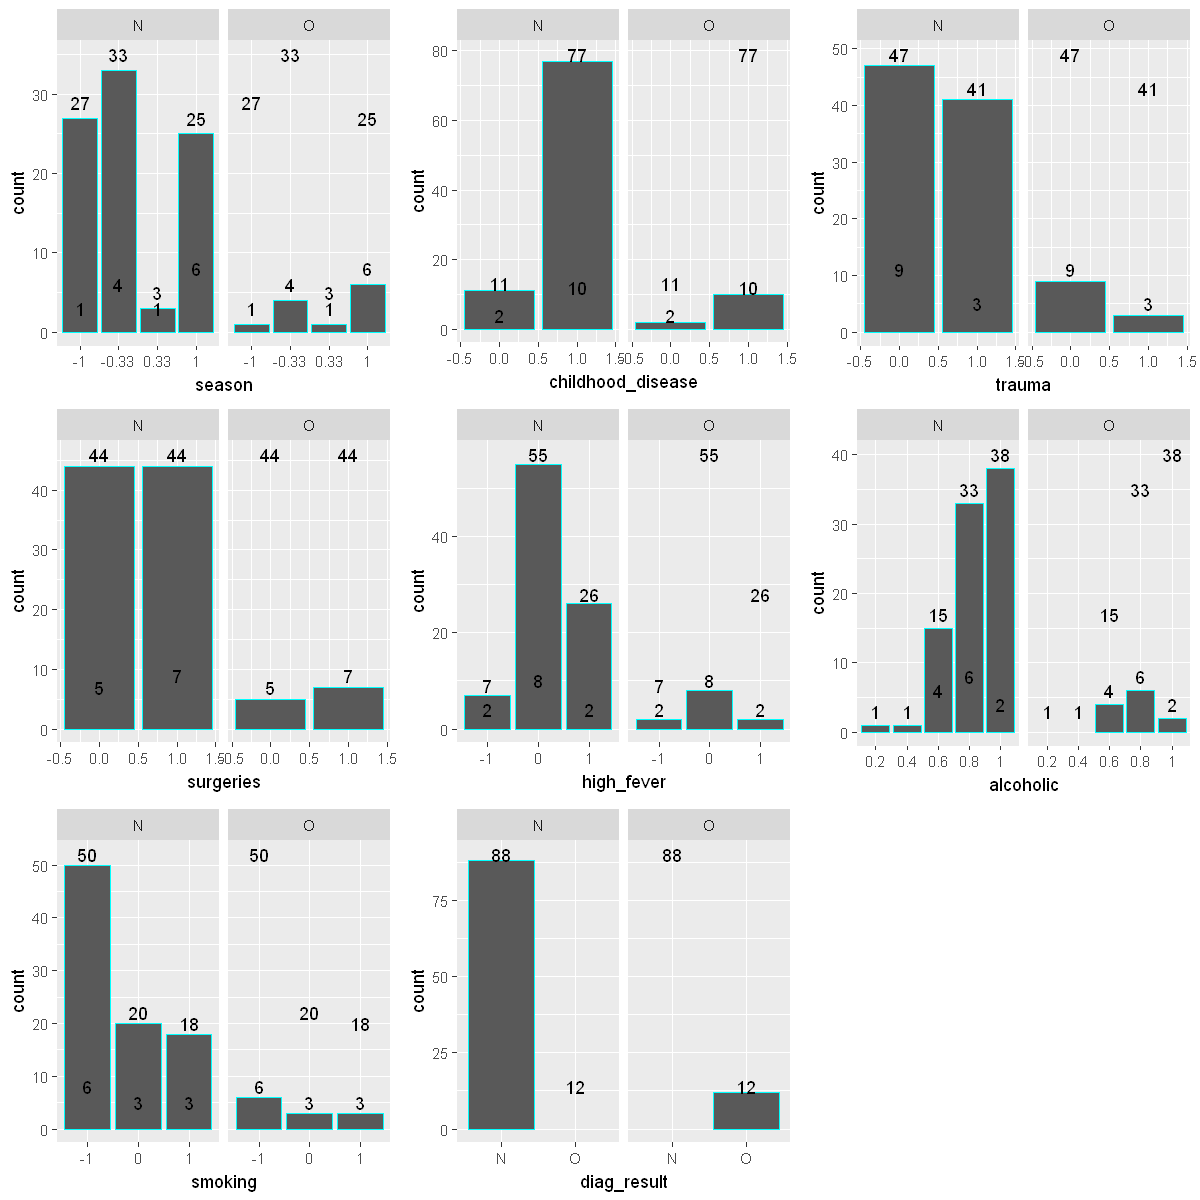

In [42]:
p <- list()
count = 1

for (x in attrbs)
{
    if(class(df[[x]]) == 'factor' | class(df[[x]]) == 'integer')
    {
        p[[count]] <- plot_hist(df, x, split_var = 'diag_result')
        count <- count + 1
    }
}

options(repr.plot.width = 10, repr.plot.height = 10)
do.call(grid.arrange, p)

# Distribution of Numerical Variables

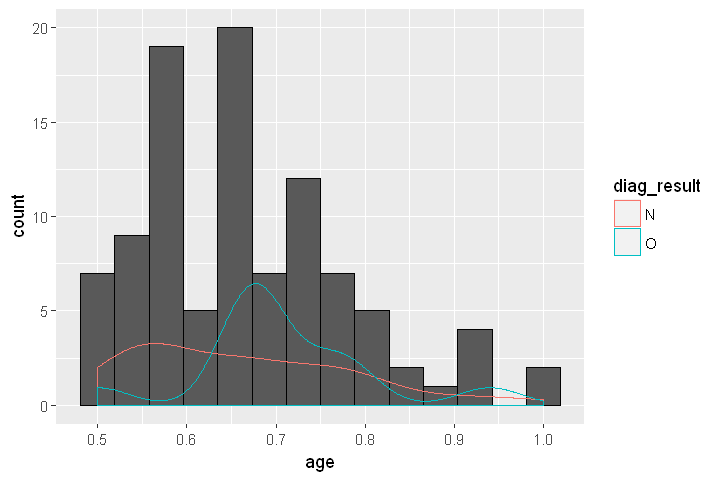

In [84]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = df, aes(x=age)) + 
    geom_histogram(bins = 14, color="black") + 
        geom_density(aes(color=diag_result), alpha=0.8)

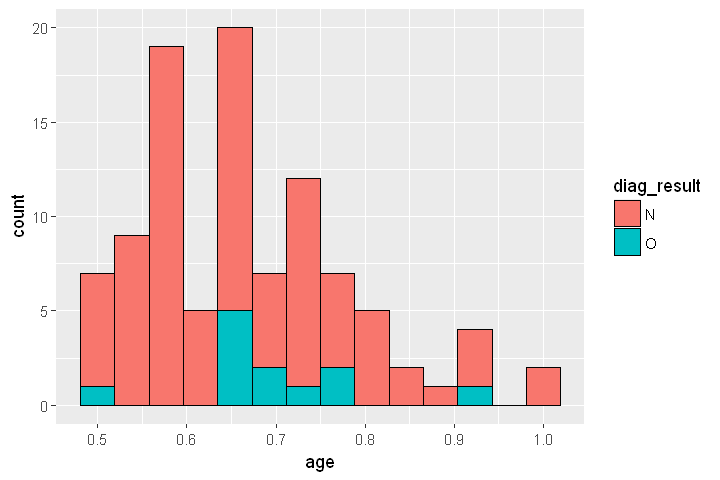

In [80]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = df, aes(x=age, fill=diag_result)) + 
    geom_histogram(bins = 14, color="black")

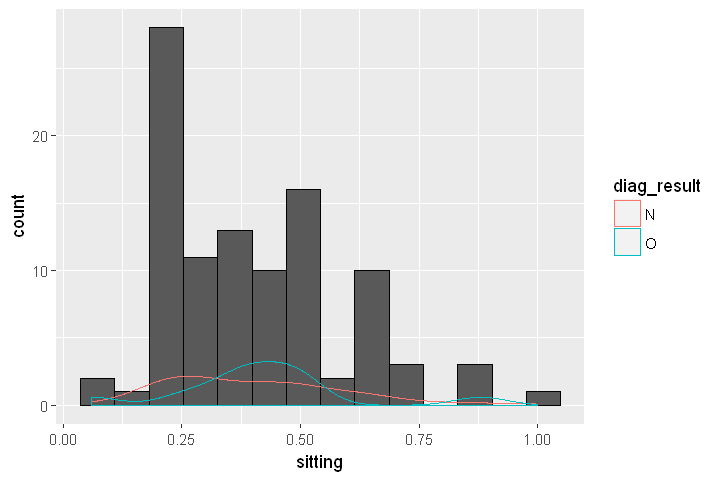

In [85]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = df, aes(x=sitting)) + 
    geom_histogram(bins = 14, color="black") + 
        geom_density(aes(color=diag_result), alpha=0.8)

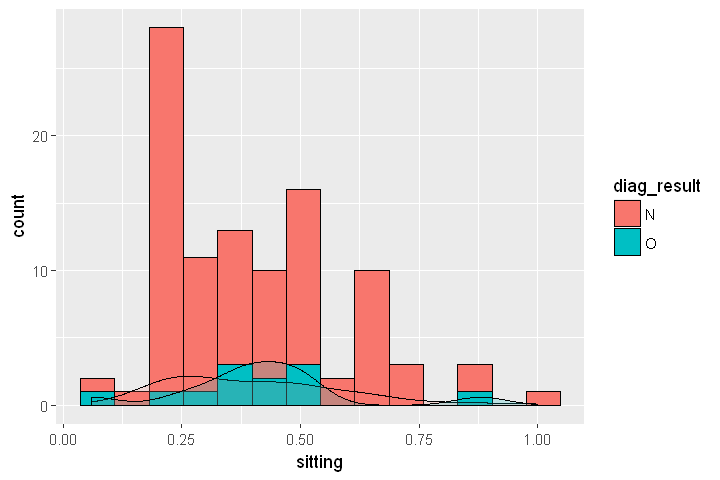

In [79]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = df, aes(x=sitting, fill=diag_result)) + 
    geom_histogram(bins = 14, color="black") + 
        geom_density(alpha=0.2)

# Correlation

`geom_smooth()` using method = 'loess'


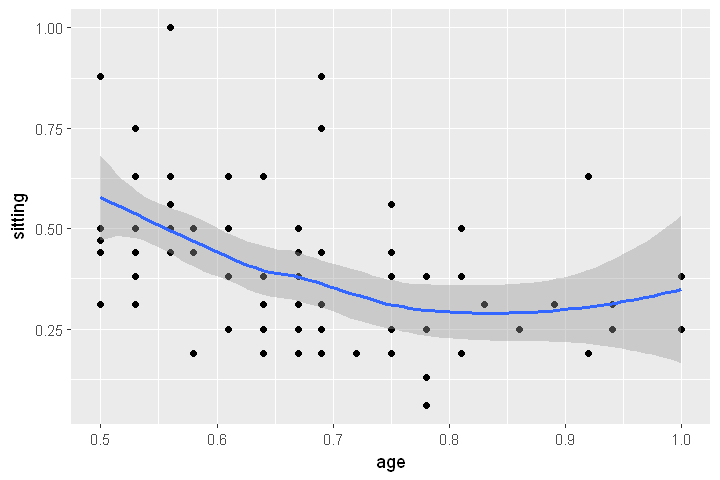

In [101]:
ggplot(data = df, aes(x=age, y=sitting)) + geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess'


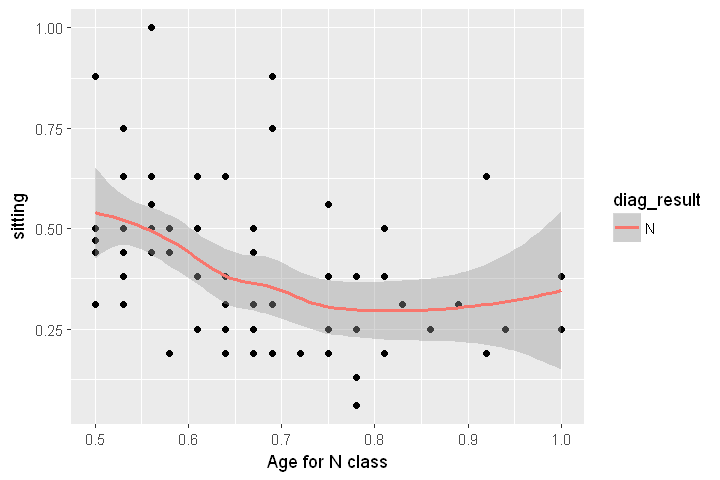

In [141]:
ggplot(data = df[df[, 'diag_result'] == 'N', ], aes(x=age, y=sitting, color = diag_result)) + 
    geom_point(color='black') + 
        geom_smooth(formula = 'y ~ poly(x, 1)') + 
            xlab('Age for N class')

`geom_smooth()` using method = 'loess'


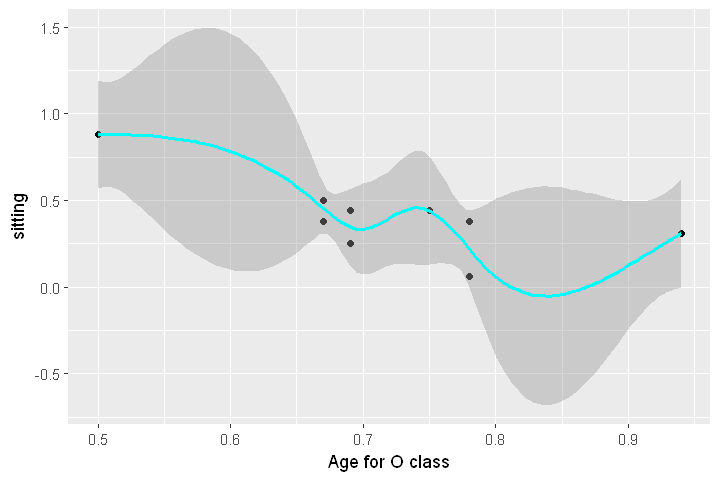

In [140]:
ggplot(data = df[df[, 'diag_result'] == 'O', ], aes(x=age, y=sitting, color = diag_result)) + 
    geom_point(color='black') + 
        geom_smooth(formula = 'y ~ x', color='cyan') + 
            xlab('Age for O class')